In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(max([i for i in X_train[0]]),min([i for i in X_train[0]]))

# 4. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 5. Define linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, in_features):
        super(LinearRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)  # Output layer
        )

    def forward(self, x):
        return self.network(x)

model = LinearRegressionModel(X_train.shape[1])
# 7. Training loop

train_loss_to_plot = []
test_loss_to_plot = []

1.2725865624711816 -1.3728111990668923


In [34]:
train_Dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_Dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
train_dataloader = torch.utils.data.DataLoader(train_Dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_Dataset, batch_size=32, shuffle=True)

# 6. Loss function and optimizer
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5000

In [39]:
epochs = 5000
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (inputs, target) in enumerate(train_dataloader):
        outputs = model(inputs)
        loss = criterion(outputs, target)

        rmse_loss = torch.sqrt(loss)
        train_loss_to_plot.append(rmse_loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        avg_loss = running_loss / len(train_dataloader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [10/5000], Loss: 0.2329
Epoch [20/5000], Loss: 0.2305
Epoch [30/5000], Loss: 0.2283
Epoch [40/5000], Loss: 0.2262
Epoch [50/5000], Loss: 0.2238
Epoch [60/5000], Loss: 0.2207
Epoch [70/5000], Loss: 0.2225
Epoch [80/5000], Loss: 0.2177
Epoch [90/5000], Loss: 0.2157
Epoch [100/5000], Loss: 0.2160
Epoch [110/5000], Loss: 0.2138
Epoch [120/5000], Loss: 0.2114
Epoch [130/5000], Loss: 0.2106
Epoch [140/5000], Loss: 0.2090
Epoch [150/5000], Loss: 0.2072
Epoch [160/5000], Loss: 0.2056
Epoch [170/5000], Loss: 0.2052
Epoch [180/5000], Loss: 0.2041
Epoch [190/5000], Loss: 0.2026
Epoch [200/5000], Loss: 0.2022
Epoch [210/5000], Loss: 0.2013
Epoch [220/5000], Loss: 0.1992
Epoch [230/5000], Loss: 0.1995
Epoch [240/5000], Loss: 0.1978
Epoch [250/5000], Loss: 0.1985
Epoch [260/5000], Loss: 0.1960
Epoch [270/5000], Loss: 0.1952
Epoch [280/5000], Loss: 0.1936
Epoch [290/5000], Loss: 0.1936
Epoch [300/5000], Loss: 0.1920
Epoch [310/5000], Loss: 0.1920
Epoch [320/5000], Loss: 0.1919
Epoch [330/5000],

In [27]:
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # rmse_loss = torch.sqrt(loss)
    # train_loss_to_plot.append(rmse_loss.item())

    # y_pred = model(X_test_tensor)
    # test_loss = criterion(y_pred, y_test_tensor)
    # test_loss_to_plot.append(torch.sqrt(test_loss).item())
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {rmse_loss.item():.4f}")

# 8. Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    epsilon = 1e-7
    # mape = torch.mean(torch.abs((y_test - y_pred) / (y_test + epsilon))) * 100
    # print(f"MAPE: {mape.item():.2f}%")
    print(f"\nTest MSE: {test_loss.item():.4f}")

Epoch [100/5000], Loss: 0.6605
Epoch [200/5000], Loss: 0.6324
Epoch [300/5000], Loss: 0.6132
Epoch [400/5000], Loss: 0.5987
Epoch [500/5000], Loss: 0.5905
Epoch [600/5000], Loss: 0.5825
Epoch [700/5000], Loss: 0.5749
Epoch [800/5000], Loss: 0.5691
Epoch [900/5000], Loss: 0.5645
Epoch [1000/5000], Loss: 0.5593
Epoch [1100/5000], Loss: 0.5557
Epoch [1200/5000], Loss: 0.5517
Epoch [1300/5000], Loss: 0.5491
Epoch [1400/5000], Loss: 0.5456
Epoch [1500/5000], Loss: 0.5413
Epoch [1600/5000], Loss: 0.5402
Epoch [1700/5000], Loss: 0.5385
Epoch [1800/5000], Loss: 0.5354
Epoch [1900/5000], Loss: 0.5342
Epoch [2000/5000], Loss: 0.5305
Epoch [2100/5000], Loss: 0.5294
Epoch [2200/5000], Loss: 0.5287
Epoch [2300/5000], Loss: 0.5252
Epoch [2400/5000], Loss: 0.5241
Epoch [2500/5000], Loss: 0.5230
Epoch [2600/5000], Loss: 0.5232
Epoch [2700/5000], Loss: 0.5225
Epoch [2800/5000], Loss: 0.5190
Epoch [2900/5000], Loss: 0.5169
Epoch [3000/5000], Loss: 0.5182
Epoch [3100/5000], Loss: 0.5173
Epoch [3200/5000]

In [5]:
import matplotlib.pyplot as plt

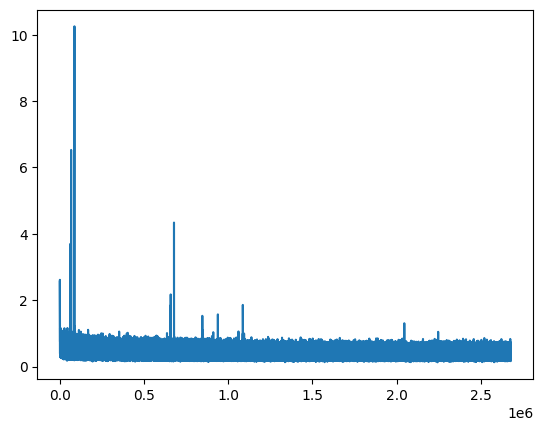

In [40]:
# plt.plot(test_loss_to_plot)
plt.plot(train_loss_to_plot)

In [12]:
y[0]

np.float64(4.526)

Epoch [100/1000], Loss: 0.8930
Epoch [200/1000], Loss: 0.8016
Epoch [300/1000], Loss: 0.7659
Epoch [400/1000], Loss: 0.7363
Epoch [500/1000], Loss: 0.7118
Epoch [600/1000], Loss: 0.6930
Epoch [700/1000], Loss: 0.6793
Epoch [800/1000], Loss: 0.6694
Epoch [900/1000], Loss: 0.6617
Epoch [1000/1000], Loss: 0.6553

Test MSE: 0.4513


In [14]:
sqrt(test_loss.item())

NameError: name 'sqrt' is not defined